In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datautils.analysis import *


In [ ]:
#!pip install git+https://github.com/CristianLazoQuispe/datautils.git, esto va primero q todo!

In [22]:
#df_airbnb = pd.read_csv('../data/raw/AB_NYC_2019.csv')
df_airbnb = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')


In [23]:
#tenemos q emular lo q se hizo en el estudio de los crimenes
df_airbnb.info()

#hay q hacer una analisis de los datos, explorar, sacar conculsiones, ver q puedo modelar, hay q poner comentarios de lo q estamos haciendo y probando
#analisis exploratorio, descubrir cosas, la entrga es explorar sacar alguna conclusion y dejarlo documentado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [24]:
df_airbnb.sample(10)
#podemos categorizar el neighbourhood y neighbourhood_group, como si fuera la alcaldia

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23118,18721209,Bronx Wakefield Large Furnished Room,130185165,Ms. H,Bronx,Wakefield,40.88702,-73.86575,Private room,60,1,39,2019-07-01,1.57,1,360
35505,28181805,Harlem White - City College,11099966,James,Manhattan,Harlem,40.82162,-73.94902,Shared room,45,2,54,2019-06-26,5.61,2,22
2906,1665498,"3rd FL, Private Suite w Own Bath & Study Area",8821936,Lynn,Staten Island,Shore Acres,40.61135,-74.06356,Entire home/apt,75,3,19,2019-05-30,0.28,1,258
307,71366,Beautiful One Bed West Village - 4 Month Special,364955,Ruperto,Manhattan,West Village,40.72966,-74.00243,Entire home/apt,200,30,39,2019-06-25,0.44,1,251
39781,30937762,Sonder | The Nash | Charming Studio + Gym,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74909,-73.97585,Entire home/apt,243,2,6,2019-06-21,1.09,327,153
19361,15450257,A home away from home in the heart of the UES:),30116728,Emily,Manhattan,Upper East Side,40.78324,-73.95149,Entire home/apt,125,5,1,2018-01-01,0.05,1,0
48462,36275781,Private Bedroom in Duplex in Williamsburg,271282883,Terence,Brooklyn,Greenpoint,40.72613,-73.94260,Private room,109,6,0,NaN,NaN,2,54
14507,11431871,"Crown Heights, Franklin Ave- Sunny Room",60059749,Amanda,Brooklyn,Crown Heights,40.67283,-73.95551,Private room,55,1,21,2017-07-26,0.53,2,0
42765,33199798,Garden Apartment in Bushwick,19729266,Sam,Brooklyn,Bushwick,40.69328,-73.92250,Entire home/apt,150,7,1,2019-04-24,0.39,1,88
13712,10291127,Doorman XL one bedroom!5109,16098958,Jeremy & Laura,Manhattan,Midtown,40.75295,-73.98889,Entire home/apt,160,30,4,2019-03-04,0.12,96,365


In [5]:
df_airbnb.describe()
#tenemos q analizar los count, para ver q data nos sirve analizar

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df_airbnb['id'].nunique()

48895

In [25]:
#usamos una funcion q creo Cristian para ver mejor los datos, seria un describe mas completo.
#numeric_desc, categorical_desc = my_df_describe(df_train,name = 'train',show = False,path=PATH_RESULTS,save=False) puedo usar el path si quiero guardar los datos en algun lado

numeric_desc, categorical_desc = my_df_describe(df_airbnb,name = 'airbnb',show = True,save=False)

#los unique me dicen q todos los id son dif, por lo q son unicos porq coinciden con el count
#el host_id se mantiene
#lat y long para poder hacer los mapas, miramos el otro codigo del crime
#cada fila es una persona alojandose en un lugar
#se puede filtar por hospedaje y filtrar los precios
#hay un precio 0, asi q podriamos ver esto, hay q analizar cada dato y ver que se puede hacer.
#
###

********************airbnb********************
shape  (48895, 16)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07,48895,0,0.000000
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08,37457,0,0.000000
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01,19048,0,0.000000
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01,14718,0,0.000000
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04,674,0,0.000000
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03,109,0,0.000000
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02,394,0,0.000000
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01,937,10052,0.205583
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02,47,0,0.000000
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02,366,0,0.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
name,48879,47905,Hillside Hotel,18,16,0.000327
host_name,48874,11452,Michael,417,21,0.000429
neighbourhood_group,48895,5,Manhattan,21661,0,0.000000
neighbourhood,48895,221,Williamsburg,3920,0,0.000000
room_type,48895,3,Entire home/apt,25409,0,0.000000
last_review,38843,1764,2019-06-23,1413,10052,0.205583


In [ ]:
#What can we learn about different hosts and areas?
#Which hosts are the busiest and why?
#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [14]:
#encontrar los host que se llaman Michael
df_airbnb[df_airbnb['host_name'] == 'Michael']



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
412,138216,Sunny and Spacious Designer's Home,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,2018-07-08,0.21,1,9
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292
811,289037,"2BR in Cobble Hill, Brooklyn, NY",632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,2016-09-05,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48378,36228909,Sunny SoHo Penthouse w/ Pvt. Terrace!,272485928,Michael,Manhattan,SoHo,40.72336,-74.00465,Entire home/apt,600,3,0,NaN,NaN,1,179
48531,36310247,Spacious 1 Bedroom With Private Garden,25498509,Michael,Brooklyn,Clinton Hill,40.68183,-73.96464,Entire home/apt,100,1,0,NaN,NaN,1,6
48786,36426788,Serene Room 5 mins from JFK / 15 mins from LGA,266645207,Michael,Queens,Laurelton,40.67025,-73.74548,Private room,75,1,0,NaN,NaN,2,180
48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Michael,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,NaN,NaN,1,14


In [15]:
#encontrar la frecuencia de la variable host_id

df_airbnb['host_id'].value_counts()



219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [16]:
sub_grupo = df_airbnb[df_airbnb['host_id'] == 16098958] #host_id es de la persona

sub_grupo

#un host_id puede tener varios hospedajes
#los hospedajes pueden estar en diferentes lugares

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5093,3662724,5144-Prime Doorman!78ST & Madison,16098958,Jeremy & Laura,Manhattan,Upper East Side,40.77448,-73.96102,Entire home/apt,175,30,2,2019-05-30,0.06,96,281
5123,3686493,Irving Place!Doorman!Laundry 5135,16098958,Jeremy & Laura,Manhattan,Gramercy,40.73632,-73.98475,Entire home/apt,175,30,0,NaN,NaN,96,312
5286,3819703,5107-Studio Doorman GYM LuX,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79082,-73.97452,Entire home/apt,140,30,4,2017-09-04,0.09,96,342
5357,3867705,5146-Doorman Pool!1 bedroom View,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79370,-73.96590,Entire home/apt,185,30,2,2018-07-16,0.13,96,310
5372,3882103,5136-Doorman 2 bedroom 3 beds!,16098958,Jeremy & Laura,Manhattan,Hell's Kitchen,40.76665,-73.98660,Entire home/apt,250,30,0,NaN,NaN,96,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42604,33070416,Prime 1 bedroom Doorman Gym RoofDeck 5221,16098958,Jeremy & Laura,Manhattan,Midtown,40.74885,-73.98698,Entire home/apt,260,30,1,2019-05-06,0.46,96,343
42605,33071794,Prime Location 44stDoorman Gym Studio!5217,16098958,Jeremy & Laura,Manhattan,Midtown,40.75032,-73.97143,Entire home/apt,175,30,0,NaN,NaN,96,342
42609,33072686,Prime Location One Bed Doorman Gym Deck!5223,16098958,Jeremy & Laura,Manhattan,Hell's Kitchen,40.76291,-73.98750,Entire home/apt,250,30,0,NaN,NaN,96,303
42611,33072804,34th and 6th Ave - Doorman Gym Roofdeck 1 bed ...,16098958,Jeremy & Laura,Manhattan,Midtown,40.74909,-73.98657,Entire home/apt,170,30,1,2019-05-12,0.51,96,345


In [17]:
sub_grupo['name'].iloc[0]

'5144-Prime Doorman!78ST & Madison '

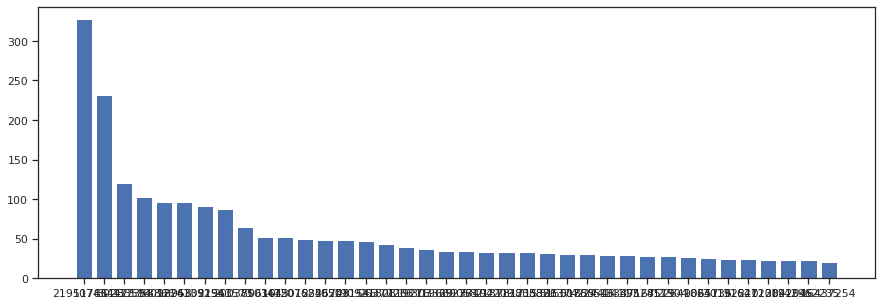

In [18]:
histogramas_de_host_aux = df_airbnb['host_id'].value_counts()
#print(histogramas_de_host_aux.index)
#print(histogramas_de_host_aux.values)

histogramas_de_host = pd.DataFrame(histogramas_de_host_aux.values,columns=['frecuencia'])
histogramas_de_host['host_id'] = histogramas_de_host_aux.index

#print(histogramas_de_host)

histogramas_de_host_aux2 = histogramas_de_host[histogramas_de_host['frecuencia'] > 20]

#print(histogramas_de_host_aux2)
fig=plt.figure(figsize=(15,5))

plt.bar(histogramas_de_host_aux2['host_id'].astype(str), histogramas_de_host_aux2['frecuencia'] )

plt.show()

#cantidad de veces q aparece el host_id, el host q tiene mas alquileres en alguna de sus propiedades


In [19]:
print(histogramas_de_host_aux2)

    frecuencia    host_id
0          327  219517861
1          232  107434423
2          121   30283594
3          103  137358866
4           96   16098958
5           96   12243051
6           91   61391963
7           87   22541573
8           65  200380610
9           52    7503643
10          52    1475015
11          50  120762452
12          49    2856748
13          49  205031545
14          47  190921808
15          43   26377263
16          39    2119276
17          37   19303369
18          34  119669058
19          34   25237492
20          33   76104209
21          33  213781715
22          33  113805886
23          32  238321374
24          31   51501835
25          31   50760546
26          30  224414117
27          29   13347167
28          28   39528519
29          28     417504
30          27  226410657
31          26    9864136
32          25  230192510
33          25  131647128
34          23  221200420
35          23    3191545
36          23  242962235
37          

In [46]:
#texto = ' hola mundo '
#print(texto.strip())

hola mundo


In [60]:


def procesamiento(df,columns=[]):
    # code
    return df

df_airbnb[df_airbnb['name'].values == 'Hillside Hotel']

#tendriamos q limpiar los espacios del final y comienzo del string

#df_airbnb[df_airbnb['name'] == '5144-Prime Doorman!78ST & Madison']

#como identificar un edificio ?

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


In [20]:

df_airbnb.groupby(['host_id','name']).size().sort_values(ascending=False)

#cuantos valores unicos de name?


host_id    name                                              
134184451  Hillside Hotel                                        18
417504     Loft Suite @ The Box House Hotel                      11
230192510  Artsy Private BR in Fort Greene Cumberland            10
76104209   IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
27636707   WEST VILLAGE Bohemian flat in neo-Tudor town house     5
                                                                 ..
13347167   Cute Apartment with Great Bathroom!                    1
           Exquisite Furnished 1-BR Studio                        1
           Fabulous Apartment with Soaking Tub                    1
           Fabulous Apt w/ Gorgeous Bathroom!                     1
274321313  Spacious Room w/ Private Rooftop, Central location     1
Length: 48636, dtype: int64